In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# https://www.kaggle.com/datasets/skooch/ddsm-mammography

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Import data from drive
In order to be able to import the data in this method, you need to make a shortcut for the CBIS-DDSM folder on your drive.

In [ ]:
cv10_data_filepath = '/content/drive/MyDrive/498_Capstone/Data/CBIS-DDSM/cv10_data/cv10_data.npy'
cv10_labels_filepath = '/content/drive/MyDrive/498_Capstone/Data/CBIS-DDSM/cv10_labels.npy'
test10_data_filepath = '/content/drive/MyDrive/498_Capstone/Data/CBIS-DDSM/test10_data/test10_data.npy'
test10_labels_filepath = '/content/drive/MyDrive/498_Capstone/Data/CBIS-DDSM/test10_labels.npy'
training_zero_filepath = '/content/drive/MyDrive/498_Capstone/Data/CBIS-DDSM/training10_0/training10_0.tfrecords'
training_one_filepath = '/content/drive/MyDrive/498_Capstone/Data/CBIS-DDSM/training10_1/training10_1.tfrecords'
training_two_filepath = '/content/drive/MyDrive/498_Capstone/Data/CBIS-DDSM/training10_2/training10_2.tfrecords'
training_three_filepath = '/content/drive/MyDrive/498_Capstone/Data/CBIS-DDSM/training10_3/training10_3.tfrecords'
training_four_filepath = '/content/drive/MyDrive/498_Capstone/Data/CBIS-DDSM/training10_4/training10_4.tfrecords'

In [ ]:
cv10_data = np.load(cv10_data_filepath)
cv10_labels = np.load(cv10_labels_filepath)
test10_data = np.load(test10_data_filepath)
test10_labels = np.load(test10_labels_filepath)

In [ ]:
training_zero = tf.data.TFRecordDataset(training_zero_filepath)
training_one = tf.data.TFRecordDataset(training_one_filepath)
training_two = tf.data.TFRecordDataset(training_two_filepath)
training_three = tf.data.TFRecordDataset(training_three_filepath)
training_four = tf.data.TFRecordDataset(training_four_filepath)

#### Combine np.ndarray and tf.TFRecordDataset objects to make full dataset

In [ ]:
# Validation and Test data are stored in numpy.ndarray objects
# For each set, there are two objects: data and labels

# Training data are stored in TFRecordDataset objects
# For each class (0,1,2,3,4), there is a tfrecorddataset objects

# The goal is to convert the tfrecorddataset objects into np.ndarray's and to combine the training, validation, and test sets

# CV10 (Validation dataset)
# label object has a len of 7682 (cases)
# elements in data object have object of 299 (i.e. numerical vector representing pixels from images)

# Test10 (Test dataset)
# label object has a len of 7682 (cases)
# elements in data object have object of 299 (i.e. numerical vector representing pixels from images)

# Validation and Test sets have total of 15364 images

In [ ]:
training_images = []
training_labels = []

feature_dictionary = {
    'label':tf.io.FixedLenFeature([],tf.int64),
    'label_normal':tf.io.FixedLenFeature([],tf.int64),
    'image':tf.io.FixedLenFeature([],tf.string)
}

def _parse_function(example,feature_dictionary=feature_dictionary):
  parsed_example = tf.io.parse_example(example,feature_dictionary)
  return(parsed_example)

def read_data(dataset):
  read_dataset = dataset.map(_parse_function)
  for features in read_dataset:
      image = tf.io.decode_raw(features['image'], tf.uint8)
      image = tf.reshape(image, [299, 299,1])
      image=image.numpy()
      training_images.append(image)
      training_labels.append(features['label'].numpy())

for training_dataset in [training_zero,training_one,training_two,training_three,training_four]:
  read_data(training_dataset)

In [ ]:
images = np.concatenate((training_images,cv10_data,test10_data),axis=0)
labels = np.concatenate((training_labels,cv10_labels,test10_labels),axis=0)

#### Exploratory Data Analysis

(array([11177.,     0., 11177.,     0.,     0., 11177.,     0., 11177.,
            0., 11177.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

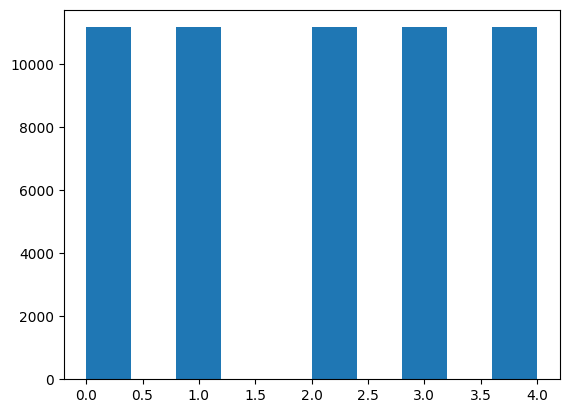

In [ ]:
plt.hist(tf_labels)

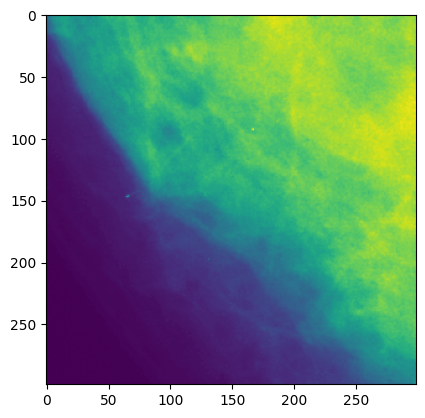

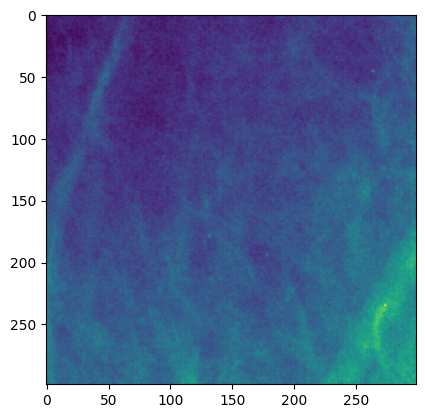

In [ ]:
for i in training_zero_ndarray[:2]:
  plt.imshow(i)
  plt.show()

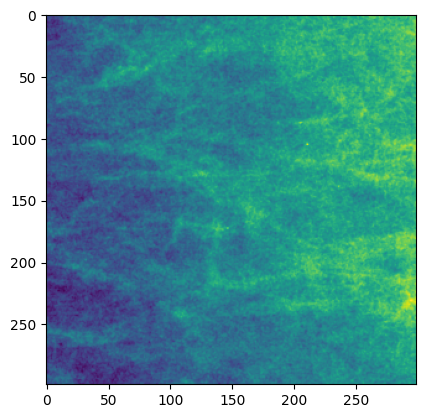

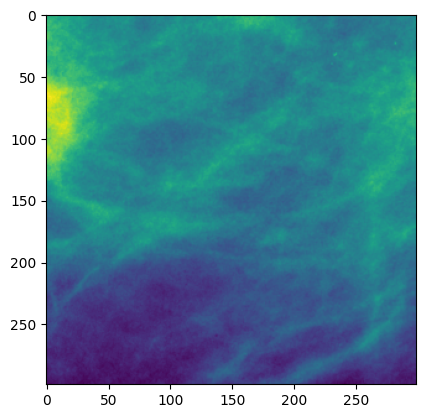

In [ ]:
for i in cv10_data[:2]:
  plt.imshow(i)
  plt.show()